# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import math
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import sklearn.metrics as sm

# 1. Hierarchical Clustering

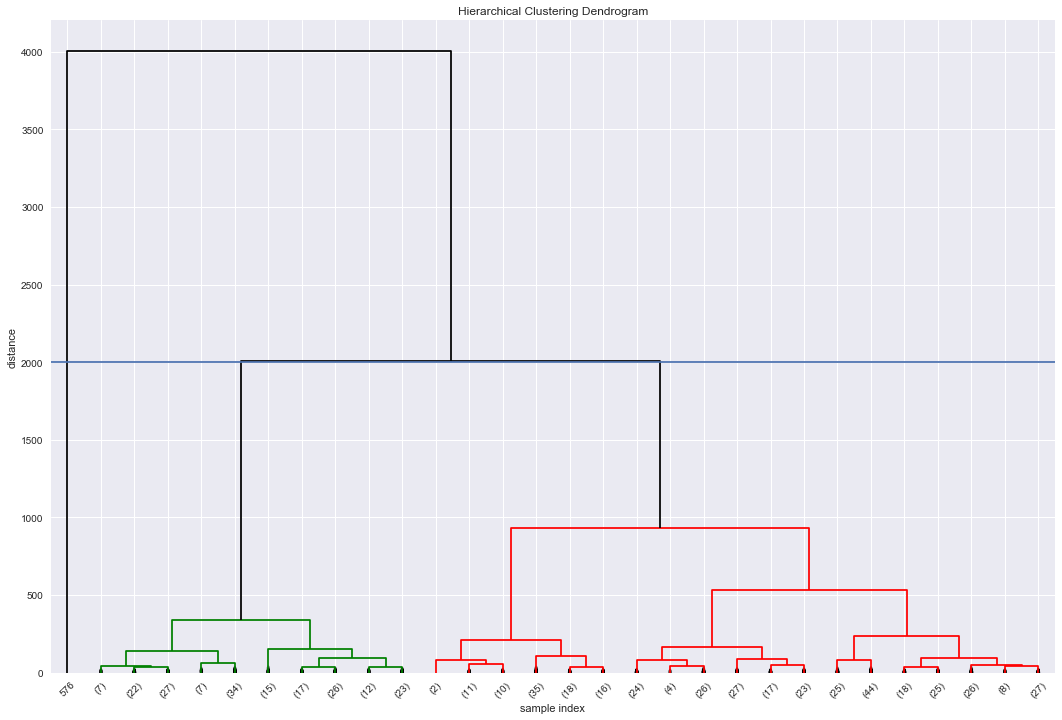

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Label of points~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0 0 0 0 2 0 0 2 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 2 2 2 0 2 0 2 0 0 0 2 0 2 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 2 0 0 0 2 2 0 2 0 0 0 2 0 2 0 2 0 0 2 0 0 2 0 2 0 0 0 0 2 0 2 2 0 0 0
 0 0 2 0 2 2 2 0 0 2 0 0 2 2 0 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2
 2 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 0 2 0 2 0 2 2 0 0 2 0 0
 0 0 2 0 2 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2
 0 0 0 2 2 0 0 0 2 2 2 2 2 0 2 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0
 0 2 2 0 2 0 0 0 2 0 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0
 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 2 0 0
 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 2 2 0 0 0 2 2 0 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 2 0 2 2 2 0 0
 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2 2 0
 0 0 0 0 2 0 0 0 0 2 0 0 

In [11]:
data = pd.read_csv('D:/CSC-591/Project4/MANDLEWALA PRIYANCE.csv',header=None)
X = data[0].values.tolist()
Y = data[1].values.tolist()
Z = data[2].values.tolist()
distance = np.arange(1731.0).reshape(577,3)
for i in range(0,576):
    distance[i][0] = X[i]
    distance[i][1] = Y[i]
    distance[i][2] = Z[i]
trace1 = go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

link = linkage(distance,'ward')
f, ax0 = plt.subplots(figsize=(18,12))
ax0.set_title('Hierarchical Clustering Dendrogram')
ax0.set_xlabel('sample index')
ax0.set_ylabel('distance')
ax0.axhline(2000)
dn = dendrogram(
    link,
    leaf_rotation=45.,
    truncate_mode='lastp',
    show_contracted=True, # font size for the x axis labels
    color_threshold=1500,
    above_threshold_color='k'
)
plt.show()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Label of points~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
ward = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(distance)
print(ward.labels_)

In [12]:
labels = ward.labels_
count0 = np.count_nonzero(labels==0)
count1 = np.count_nonzero(labels==1)
count2 = np.count_nonzero(labels==2)
label0 = []
label1 = []
label2 = []

for h in range(0,577):
    if labels[h] == 0:
        label0.append(distance[h])
    elif labels[h]==1:
        label1.append(distance[h])
    else:
        label2.append(distance[h])
labelAt0 = pd.DataFrame.from_records(label0)
labelAt1 = pd.DataFrame.from_records(label1)
labelAt2 = pd.DataFrame.from_records(label2)
trace2 = go.Scatter3d(
    x=labelAt0[0],
    y=labelAt0[1],
    z=labelAt0[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace3 = go.Scatter3d(
    x=labelAt1[0],
    y=labelAt1[1],
    z=labelAt1[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
trace4 = go.Scatter3d(
    x=labelAt2[0],
    y=labelAt2[1],
    z=labelAt2[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
data = [trace2,trace3,trace4]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 2. k-Means clustering

In [13]:
distort = []
dist = np.array(list(zip(X,Y,Z))).reshape(len(X), 3)
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(distance)
    distort.append(sum(np.min(cdist(distance, kmeans.cluster_centers_, 'euclidean'), axis=1)) / dist.shape[0])
K = list(range(2,10))
trace0 = go.Scatter(
    x = K,
    y = distort,
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title = 'Elbow Method',
              xaxis = dict(title = 'Value of K'),
              yaxis = dict(title = 'Within cluster sum of squares'),
              )
data = [trace0]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [14]:
kmeansBest = KMeans(n_clusters=4, random_state=0).fit(distance)
kmeansLabels = kmeansBest.labels_
kmeansLabel0 = []
kmeansLabel1 = []
kmeansLabel2 = []
kmeansLabel3 = []
for h in range(0,577):
    if kmeansLabels[h] == 0:
        kmeansLabel0.append(distance[h])
    elif kmeansLabels[h]==1:
        kmeansLabel1.append(distance[h])
    elif kmeansLabels[h]==2:
        kmeansLabel2.append(distance[h])
    else:
        kmeansLabel3.append(distance[h])
kmeansLabelAt0 = pd.DataFrame.from_records(kmeansLabel0)
kmeansLabelAt1 = pd.DataFrame.from_records(kmeansLabel1)
kmeansLabelAt2 = pd.DataFrame.from_records(kmeansLabel2)
kmeansLabelAt3 = pd.DataFrame.from_records(kmeansLabel3)
trace5 = go.Scatter3d(
    x=kmeansLabelAt0[0],
    y=kmeansLabelAt0[1],
    z=kmeansLabelAt0[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace6 = go.Scatter3d(
    x=kmeansLabelAt1[0],
    y=kmeansLabelAt1[1],
    z=kmeansLabelAt1[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
trace7 = go.Scatter3d(
    x=kmeansLabelAt2[0],
    y=kmeansLabelAt2[1],
    z=kmeansLabelAt2[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
trace8 = go.Scatter3d(
    x=kmeansLabelAt3[0],
    y=kmeansLabelAt3[1],
    z=kmeansLabelAt3[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
data = [trace5,trace6,trace7,trace8]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 3. DB-SCAN

### For minPts=3

In [15]:
minDistance = []
for l in range(0,577):
    interDistance = []
    for k in range(0,577):
        if(l==k):
            continue
        else:
            intermediateDistance = math.sqrt((X[l]-X[k])**2+(Y[l]-Y[k])**2+(Z[l]-Z[k])**2)
            interDistance.append(intermediateDistance)
            interDistance.sort()
    minDistance.append(interDistance[2])
    minDistance.sort(reverse=True)
Q = list(range(0,577))
Q.sort(reverse=True)
trace0 = go.Scatter(
    x = Q,
    y = minDistance,
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title = 'Elbow Method',
              xaxis = dict(title = 'Data'),
              yaxis = dict(title = 'Radius'),
              )
data = [trace0]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [17]:
dbscan = DBSCAN(eps=7,min_samples=3,metric='euclidean').fit(distance)
dbscanLabels = dbscan.labels_
print(dbscanLabels)

[ 0  0  0  0  1  0  0  1  1  1  0  0  0  0  0  0  0  0  1  1  0  0  0  1  1
  1  0  1  0  1  0  0  0  1  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0
  0  1  0  0  0  1  1  0  1  0  0  0  1  0  1  0  1  0  0  1  0  0  1  0 -1
  0  0  0  0  1  0  1  1 -1  0  0  0  0  1  0  1  1  1  0  0  1  0  0  1 -1
  0  0  0  1  1  1  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  1  1  1  1  1
  0  0  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0 -1 -1  0  0  0  0  1
  0  1  0  1  1  0  0  1  0  0  0  0  1  0  1 -1  0  1  0  0  0  0  0  0  0
  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  1  0  0  0
  1  1  0  0  0  1  1  1  1  1  0  1  0  1  0 -1  0  0  0  0  1  1  0  0  0
  0  0  0  0  0  1  1  0  0  0  1  1  0  1  0  0  0  1  0  1  0  0  0  0  0
  1  0  0  1  0  0  0  1  0  0  0  0  1  0  0  0  0  0  1  1  0 -1  0  0  0
  0  0  0  0  1  0  1  0  1  0  2  1  0  0  0  0  0  0  0  0  2  1  1  0  0
  0  0  0  0

In [18]:
dbscanLabelminus1 = []
dbscanLabel0 = []
dbscanLabel1 = []
dbscanLabel2 = []
for h in range(0,577):
    if dbscanLabels[h] == -1:
        dbscanLabelminus1.append(distance[h])
    elif dbscanLabels[h]==0:
        dbscanLabel0.append(distance[h])
    elif dbscanLabels[h]==1:
        dbscanLabel1.append(distance[h])
    else:
        dbscanLabel2.append(distance[h])
dbscanLabelAtminus1 = pd.DataFrame.from_records(dbscanLabelminus1)
dbscanLabelAt0 = pd.DataFrame.from_records(dbscanLabel0)
dbscanLabelAt1 = pd.DataFrame.from_records(dbscanLabel1)
dbscanLabelAt2 = pd.DataFrame.from_records(dbscanLabel2)
trace9 = go.Scatter3d(
    x=dbscanLabelAtminus1[0],
    y=dbscanLabelAtminus1[1],
    z=dbscanLabelAtminus1[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace10 = go.Scatter3d(
    x=dbscanLabelAt0[0],
    y=dbscanLabelAt0[1],
    z=dbscanLabelAt0[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
trace11 = go.Scatter3d(
    x=dbscanLabelAt1[0],
    y=dbscanLabelAt1[1],
    z=dbscanLabelAt1[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
trace12 = go.Scatter3d(
    x=dbscanLabelAt2[0],
    y=dbscanLabelAt2[1],
    z=dbscanLabelAt2[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
data = [trace9,trace10,trace11,trace12]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### For minPts=4

In [19]:
minDistance1 = []
for l in range(0,577):
    interDistance1 = []
    for k in range(0,577):
        if(l==k):
            continue
        else:
            intermediateDistance1 = math.sqrt((X[l]-X[k])**2+(Y[l]-Y[k])**2+(Z[l]-Z[k])**2)
            interDistance1.append(intermediateDistance1)
            interDistance1.sort()
    minDistance1.append(interDistance1[3])
    minDistance1.sort(reverse=True)
Q1 = list(range(0,577))
Q1.sort(reverse=True)
trace0 = go.Scatter(
    x = Q1,
    y = minDistance1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title = 'Elbow Method',
              xaxis = dict(title = 'Data'),
              yaxis = dict(title = 'Radius'),
              )
data = [trace0]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [20]:
dbscan1 = DBSCAN(eps=8,min_samples=4,metric='euclidean').fit(distance)
dbscanLabels1 = dbscan1.labels_

In [21]:
dbscanLabelminus11 = []
dbscanLabel01 = []
dbscanLabel11 = []
for h in range(0,577):
    if dbscanLabels1[h] == -1:
        dbscanLabelminus11.append(distance[h])
    elif dbscanLabels1[h]==0:
        dbscanLabel01.append(distance[h])
    else:
        dbscanLabel11.append(distance[h])
dbscanLabelAtminus11 = pd.DataFrame.from_records(dbscanLabelminus11)
dbscanLabelAt01 = pd.DataFrame.from_records(dbscanLabel01)
dbscanLabelAt11 = pd.DataFrame.from_records(dbscanLabel11)
trace13 = go.Scatter3d(
    x=dbscanLabelAtminus11[0],
    y=dbscanLabelAtminus11[1],
    z=dbscanLabelAtminus11[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace14 = go.Scatter3d(
    x=dbscanLabelAt01[0],
    y=dbscanLabelAt01[1],
    z=dbscanLabelAt01[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
trace15 = go.Scatter3d(
    x=dbscanLabelAt11[0],
    y=dbscanLabelAt11[1],
    z=dbscanLabelAt11[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(138, 138, 138,0.14)',
            width=0.3
        ),
        opacity=0.9
    )
)
data = [trace13,trace14,trace15]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### For minPts=5

In [22]:
minDistance2 = []
for l in range(0,577):
    interDistance2 = []
    for k in range(0,577):
        if(l==k):
            continue
        else:
            intermediateDistance2 = math.sqrt((X[l]-X[k])**2+(Y[l]-Y[k])**2+(Z[l]-Z[k])**2)
            interDistance2.append(intermediateDistance2)
            interDistance2.sort()
    minDistance2.append(interDistance2[4])
    minDistance2.sort(reverse=True)
Q2 = list(range(0,577))
Q2.sort(reverse=True)
trace0 = go.Scatter(
    x = Q2,
    y = minDistance2,
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title = 'Elbow Method',
              xaxis = dict(title = 'Data'),
              yaxis = dict(title = 'Radius'),
              )
data = [trace0]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [23]:
dbscan2 = DBSCAN(eps=9.5,min_samples=5,metric='euclidean').fit(distance)
dbscanLabels2 = dbscan2.labels_

In [24]:
dbscanLabelminus12 = []
dbscanLabel02 = []
for h in range(0,577):
    if dbscanLabels2[h] == -1:
        dbscanLabelminus12.append(distance[h])
    else:
        dbscanLabel02.append(distance[h])
dbscanLabelAtminus12 = pd.DataFrame.from_records(dbscanLabelminus12)
dbscanLabelAt02 = pd.DataFrame.from_records(dbscanLabel02)
trace16 = go.Scatter3d(
    x=dbscanLabelAtminus12[0],
    y=dbscanLabelAtminus12[1],
    z=dbscanLabelAtminus12[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace17 = go.Scatter3d(
    x=dbscanLabelAt02[0],
    y=dbscanLabelAt02[1],
    z=dbscanLabelAt02[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
data = [trace16,trace17]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### For minPts=6

In [25]:
minDistance3 = []
for l in range(0,577):
    interDistance3 = []
    for k in range(0,577):
        if(l==k):
            continue
        else:
            intermediateDistance3 = math.sqrt((X[l]-X[k])**2+(Y[l]-Y[k])**2+(Z[l]-Z[k])**2)
            interDistance3.append(intermediateDistance3)
            interDistance3.sort()
    minDistance3.append(interDistance3[5])
    minDistance3.sort(reverse=True)
Q3 = list(range(0,577))
Q3.sort(reverse=True)
trace0 = go.Scatter(
    x = Q3,
    y = minDistance3,
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title = 'Elbow Method',
              xaxis = dict(title = 'Data'),
              yaxis = dict(title = 'Radius'),
              )
data = [trace0]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [26]:
dbscan3 = DBSCAN(eps=10.2,min_samples=6,metric='euclidean').fit(distance)
dbscanLabels3 = dbscan3.labels_

In [27]:
dbscanLabelminus13 = []
dbscanLabel03 = []
for h in range(0,577):
    if dbscanLabels3[h] == -1:
        dbscanLabelminus13.append(distance[h])
    else:
        dbscanLabel03.append(distance[h])
dbscanLabelAtminus13 = pd.DataFrame.from_records(dbscanLabelminus13)
dbscanLabelAt03 = pd.DataFrame.from_records(dbscanLabel03)
trace18 = go.Scatter3d(
    x=dbscanLabelAtminus13[0],
    y=dbscanLabelAtminus13[1],
    z=dbscanLabelAtminus13[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217,0.14)',
            width=0.1
        ),
        opacity=0.9
    )
)
trace19 = go.Scatter3d(
    x=dbscanLabelAt03[0],
    y=dbscanLabelAt03[1],
    z=dbscanLabelAt03[2],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(256, 256, 256,0.14)',
            width=0.2
        ),
        opacity=0.9
    )
)
data = [trace18,trace19]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [100,400],),
                    yaxis = dict(
                        nticks=4, range = [0,20],),
                    zaxis = dict(
                        nticks=4, range = [0,50]   ,),),
                    width=700,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# 4. Compare and discuss the results from all three methods. Identify the best clustering of the dataset.